In [1]:
import pandas as pd
import numpy as np

In [2]:
facebook = pd.read_csv('facebook.csv')  

/Users/Mahsa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
facebook.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [4]:
facebook.describe()

,dataset_id,checkins,were_here_count,likes,talking_about_count,facebook_id,entity_id,cusip,isin
count,3.621391e+06,3.621391e+06,3.621391e+06,3.621391e+06,3.621391e+06,3.621391e+06,0.0,0.0,0.0
mean,2.728824e+05,1.417013e+04,1.356737e+05,8.166253e+05,1.004266e+04,1.737944e+14,NaN,NaN,NaN
std,3.888200e+05,2.326502e+05,1.330491e+06,4.937245e+06,7.292689e+04,4.413697e+14,NaN,NaN,NaN
min,5.261200e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.181544e+09,NaN,NaN,NaN
25%,5.361000e+04,0.000000e+00,0.000000e+00,2.500000e+03,2.700000e+01,9.448069e+10,NaN,NaN,NaN
50%,6.361600e+04,1.300000e+01,0.000000e+00,2.047700e+04,2.510000e+02,1.122613e+14,NaN,NaN,NaN
75%,9.057400e+04,2.860000e+02,1.140000e+02,2.175790e+05,2.474000e+03,1.940853e+14,NaN,NaN,NaN
max,2.340089e+06,1.729055e+07,3.682637e+07,2.106411e+08,5.747010e+06,1.015013e+16,NaN,NaN,NaN


In [5]:
facebook = facebook.drop(['entity_id','cusip','isin', 'date_added', 'date_updated' ], axis=1)

In [6]:
facebook.isnull().sum()

dataset_id                  0
time                        0
username               120929
checkins                    0
has_added_app               0
were_here_count             0
likes                       0
talking_about_count         0
facebook_id                 0
dtype: int64

In [7]:
df = facebook[['dataset_id', 'talking_about_count']]

In [8]:
df

,dataset_id,talking_about_count
0,53088,587
1,52642,1305
2,53656,297
3,53033,2685
4,52783,0
...,...,...
3621386,1333153,23
3621387,911424,50882
3621388,64854,429
3621389,57960,2847


In [9]:
df.isnull().sum()

dataset_id             0
talking_about_count    0
dtype: int64

In [149]:
grouped = df.groupby('dataset_id').std()
grouped

,talking_about_count
dataset_id,
52612,104972.294520
52615,16.990658
52619,40.444583
52620,218.785591
52621,8624.145099
...,...
2339815,627.473771
2339816,263.449552
2339817,113.466588


In [150]:
grouped = grouped[grouped['talking_about_count'] > 600000]
grouped.reset_index(inplace = True)

grouped = grouped.rename(columns={"dataset_id": "ID", "talking_about_count": "std_talking_about_count"})

In [151]:
grouped

,ID,std_talking_about_count
0,53470,690647.941761
1,56677,650379.771238
2,868421,852774.807781
3,869047,674762.393334


In [152]:
meanGrouped = df.groupby('dataset_id').mean()
meanGrouped.reset_index(inplace = True)
meanGrouped

,dataset_id,talking_about_count
0,52612,125494.788525
1,52615,5.400376
2,52619,54.393155
3,52620,89.424953
4,52621,3250.062157
...,...,...
4709,2339815,2543.000000
4710,2339816,3503.500000
4711,2339817,620.000000
4712,2339875,803.000000


In [153]:
meanGrouped = meanGrouped.loc[meanGrouped['dataset_id'].isin(grouped['ID'])]
meanGrouped.reset_index(drop = True, inplace = True)
meanGrouped = meanGrouped.rename(columns={"talking_about_count": "mean_talking_about_count"})
#meanGrouped['outlier_talking_about_count'] = meanGrouped['talking_about_count'] - 3*grouped['talking_about_count']
meanGrouped

,dataset_id,mean_talking_about_count
0,53470,1.641433e+06
1,56677,6.447248e+05
2,868421,1.048189e+06
3,869047,7.528102e+05


In [156]:
meanStd = pd.concat([meanGrouped, grouped], axis=1)
meanStd = meanStd.drop(['ID'], axis=1)

In [158]:
meanStd['outlier1_talking_about_count'] = meanStd['mean_talking_about_count'] - 3*meanStd['std_talking_about_count']
meanStd['outlier2_talking_about_count'] = meanStd['mean_talking_about_count'] + 3*meanStd['std_talking_about_count']
meanStd

,dataset_id,mean_talking_about_count,std_talking_about_count,outlier1_talking_about_count,outlier2_talking_about_count
0,53470,1.641433e+06,690647.941761,-4.305108e+05,3.713377e+06
1,56677,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
2,868421,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
3,869047,7.528102e+05,674762.393334,-1.271477e+06,2.777097e+06


From the meanStd dataframe, we notice that the below range for outlier should be ignored because it is less than zero.
Therefore, I will only check for those users whos talking_about_count is more than the outlier2_talking_about_count.
In than case, we can say that there had been a highly publicized events or marketing campaigns for those dates that the volatility occured. 

In [160]:
import datetime
from datetime import datetime



facebook['Dates'] = pd.to_datetime(facebook['time']).dt.date

In [161]:
facebook['Dates'] = pd.to_datetime(facebook['Dates'])
df2 = facebook[(facebook['Dates'] > '2017-7-01') & (facebook['Dates'] < '2018-08-01')]


In [162]:
df2

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,Dates
2131509,911358,2017-07-02 04:00:00+00,Aussie,0,f,0,616365,550,16454926828,2017-07-02
2131510,868633,2017-07-02 04:00:00+00,TDAmeritradeInstitutional,0,f,0,13537,40,716060288529915,2017-07-02
2131511,53538,2017-07-02 04:00:00+00,Plantronics,0,f,0,138723,1115,52236896581,2017-07-02
2131512,65787,2017-07-02 04:00:00+00,tigexbabycare,0,f,0,54009,1207,275462146340,2017-07-02
2131513,902012,2017-07-02 04:00:00+00,CascadeMicrotech,114,f,114,183,2,114917311895759,2017-07-02
...,...,...,...,...,...,...,...,...,...,...
3621386,1333153,2018-07-17 04:00:00+00,SignatureStyleSalons,0,f,0,400,23,1522066374789370,2018-07-17
3621387,911424,2018-07-17 04:00:00+00,tdr.jp,510211,f,510211,1105124,50882,213982575367704,2018-07-17
3621388,64854,2018-07-17 04:00:00+00,fiberone,0,f,0,576589,429,150319295010117,2018-07-17
3621389,57960,2018-07-17 04:00:00+00,PayPal,0,f,0,5913042,2847,589464587749730,2018-07-17


In [165]:
df2 = df2.loc[df2['dataset_id'].isin(grouped['ID'])]
df2

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,Dates
2132136,869047,2017-07-02 04:00:00+00,Storyful,0,f,0,2620343,650270,350097413540,2017-07-02
2133169,868421,2017-07-02 04:00:00+00,CBSNews,426,f,0,4274273,4570080,131459315949,2017-07-02
2135060,56677,2017-07-02 04:00:00+00,yahoo,52300,f,0,13848037,1067328,7040724713,2017-07-02
2135297,53470,2017-07-02 04:00:00+00,manchesterunited,15754,f,2228964,73678213,655406,7724542745,2017-07-02
2138095,869047,2017-07-03 04:00:00+00,Storyful,0,f,0,2631459,861110,350097413540,2017-07-03
...,...,...,...,...,...,...,...,...,...,...
3613388,869047,2018-07-14 04:00:00+00,Storyful,0,f,0,3052523,84370,350097413540,2018-07-14
3617266,56677,2018-07-16 04:00:00+00,yahoo,53394,f,0,15092469,2538336,7040724713,2018-07-16
3617457,869047,2018-07-16 04:00:00+00,Storyful,0,f,0,3052787,61766,350097413540,2018-07-16
3618394,868421,2018-07-16 04:00:00+00,CBSNews,419,f,0,4898420,2379327,131459315949,2018-07-16


In [168]:
merged_left = pd.merge(left=df2, right=meanStd, how='left', left_on='dataset_id', right_on='dataset_id')
merged_left

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,Dates,mean_talking_about_count,std_talking_about_count,outlier1_talking_about_count,outlier2_talking_about_count
0,869047,2017-07-02 04:00:00+00,Storyful,0,f,0,2620343,650270,350097413540,2017-07-02,7.528102e+05,674762.393334,-1.271477e+06,2.777097e+06
1,868421,2017-07-02 04:00:00+00,CBSNews,426,f,0,4274273,4570080,131459315949,2017-07-02,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
2,56677,2017-07-02 04:00:00+00,yahoo,52300,f,0,13848037,1067328,7040724713,2017-07-02,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
3,53470,2017-07-02 04:00:00+00,manchesterunited,15754,f,2228964,73678213,655406,7724542745,2017-07-02,1.641433e+06,690647.941761,-4.305108e+05,3.713377e+06
4,869047,2017-07-03 04:00:00+00,Storyful,0,f,0,2631459,861110,350097413540,2017-07-03,7.528102e+05,674762.393334,-1.271477e+06,2.777097e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,869047,2018-07-14 04:00:00+00,Storyful,0,f,0,3052523,84370,350097413540,2018-07-14,7.528102e+05,674762.393334,-1.271477e+06,2.777097e+06
1342,56677,2018-07-16 04:00:00+00,yahoo,53394,f,0,15092469,2538336,7040724713,2018-07-16,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
1343,869047,2018-07-16 04:00:00+00,Storyful,0,f,0,3052787,61766,350097413540,2018-07-16,7.528102e+05,674762.393334,-1.271477e+06,2.777097e+06
1344,868421,2018-07-16 04:00:00+00,CBSNews,419,f,0,4898420,2379327,131459315949,2018-07-16,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06


In [169]:
df2

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,Dates
2132136,869047,2017-07-02 04:00:00+00,Storyful,0,f,0,2620343,650270,350097413540,2017-07-02
2133169,868421,2017-07-02 04:00:00+00,CBSNews,426,f,0,4274273,4570080,131459315949,2017-07-02
2135060,56677,2017-07-02 04:00:00+00,yahoo,52300,f,0,13848037,1067328,7040724713,2017-07-02
2135297,53470,2017-07-02 04:00:00+00,manchesterunited,15754,f,2228964,73678213,655406,7724542745,2017-07-02
2138095,869047,2017-07-03 04:00:00+00,Storyful,0,f,0,2631459,861110,350097413540,2017-07-03
...,...,...,...,...,...,...,...,...,...,...
3613388,869047,2018-07-14 04:00:00+00,Storyful,0,f,0,3052523,84370,350097413540,2018-07-14
3617266,56677,2018-07-16 04:00:00+00,yahoo,53394,f,0,15092469,2538336,7040724713,2018-07-16
3617457,869047,2018-07-16 04:00:00+00,Storyful,0,f,0,3052787,61766,350097413540,2018-07-16
3618394,868421,2018-07-16 04:00:00+00,CBSNews,419,f,0,4898420,2379327,131459315949,2018-07-16


In [170]:
df2 = df2[['username', 'talking_about_count', 'Dates']]
df2.reset_index(inplace = True, drop = True)
df2

,username,talking_about_count,Dates
0,Storyful,650270,2017-07-02
1,CBSNews,4570080,2017-07-02
2,yahoo,1067328,2017-07-02
3,manchesterunited,655406,2017-07-02
4,Storyful,861110,2017-07-03
...,...,...,...
1341,Storyful,84370,2018-07-14
1342,yahoo,2538336,2018-07-16
1343,Storyful,61766,2018-07-16
1344,CBSNews,2379327,2018-07-16


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

array([<AxesSubplot:xlabel='Dates'>, <AxesSubplot:xlabel='Dates'>,
       <AxesSubplot:xlabel='Dates'>, <AxesSubplot:xlabel='Dates'>],
      dtype=object)

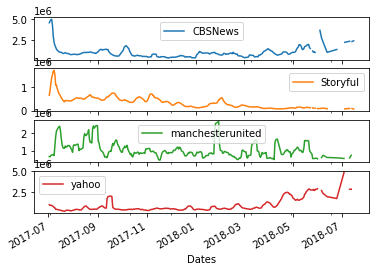

In [172]:
pd.pivot_table(df2.set_index('username'),
               index='Dates', columns='username', values='talking_about_count'
              ).plot(subplots=True)

In [175]:
outlier = merged_left[merged_left['talking_about_count'] > merged_left['outlier2_talking_about_count']]
outlier

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,Dates,mean_talking_about_count,std_talking_about_count,outlier1_talking_about_count,outlier2_talking_about_count
1,868421,2017-07-02 04:00:00+00,CBSNews,426,f,0,4274273,4570080,131459315949,2017-07-02,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
5,868421,2017-07-03 04:00:00+00,CBSNews,426,f,0,4278556,4774865,131459315949,2017-07-03,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
9,868421,2017-07-04 04:00:00+00,CBSNews,426,f,0,4281939,4932958,131459315949,2017-07-04,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
12,868421,2017-07-05 04:00:00+00,CBSNews,426,f,0,4284765,4995264,131459315949,2017-07-05,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
16,868421,2017-07-06 04:00:00+00,CBSNews,426,f,0,4286981,4246567,131459315949,2017-07-06,1.048189e+06,852774.807781,-1.510135e+06,3.606514e+06
1263,56677,2018-05-19 04:00:00+00,yahoo,53617,f,0,14454288,2681564,7040724713,2018-05-19,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
1268,56677,2018-05-20 04:00:00+00,yahoo,53621,f,0,14464257,2797473,7040724713,2018-05-20,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
1273,56677,2018-05-21 04:00:00+00,yahoo,53626,f,0,14475597,2912445,7040724713,2018-05-21,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
1277,56677,2018-05-22 04:00:00+00,yahoo,53626,f,0,14485246,2895370,7040724713,2018-05-22,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06
1282,56677,2018-05-23 04:00:00+00,yahoo,53622,f,0,14495576,2795361,7040724713,2018-05-23,6.447248e+05,650379.771238,-1.306414e+06,2.595864e+06


In [181]:
out = outlier.groupby('username')
out.size()

username
CBSNews     6
yahoo      18
dtype: int64

By the above results, we notice that the reason of the volatility for yahoo and the CBSNews is because of their outliers. This means that these may have happened because of some sort of events. This was also noticable from the plot above.
storyful and ManchesterUnited volatility is a high, but there is no outlier to cause that. However, I have calculated the outlier as 3 std from the mean, because of the time limit in this challange. To analyze deeper, we can set the outlier for 2 std from the mean and then analyze the outliers and their cause more.

In [248]:
df = facebook[facebook['checkins'] > 10000]

In [249]:
df

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,Dates
76,52612,2015-01-01 05:00:00+00,walmart,14428,f,9481876,34955584,38282,159616034235,2015-01-01
86,53063,2015-01-01 05:00:00+00,starbucksindia,43150,f,0,338964,33880,412938118755623,2015-01-01
101,53321,2015-01-01 05:00:00+00,delta,17425,f,2416594,1394230,19121,125472670805257,2015-01-01
231,52693,2015-01-01 05:00:00+00,crackerbarrel,110688,f,5679526,2370971,59703,175123745870734,2015-01-01
236,52759,2015-01-01 05:00:00+00,dennys,61952,f,3769077,894027,11116,55330643140,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
3621220,67135,2018-07-17 04:00:00+00,HollywoodMVRC,41012,f,41012,34350,161,164023867104993,2018-07-17
3621237,53618,2018-07-17 04:00:00+00,TysonFoods,101847,f,0,283773,624,205200659535460,2018-07-17
3621256,64663,2018-07-17 04:00:00+00,walmartmuseum,26484,f,26484,14808,296,148673571859180,2018-07-17
3621333,67136,2018-07-17 04:00:00+00,HollywoodCasinoSTL,103379,f,103379,48732,807,420930617954897,2018-07-17


In [250]:
df = df.drop(['dataset_id','facebook_id'], axis=1)

In [251]:
df.reset_index(inplace = True, drop = True)

In [252]:
df

,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,Dates
0,2015-01-01 05:00:00+00,walmart,14428,f,9481876,34955584,38282,2015-01-01
1,2015-01-01 05:00:00+00,starbucksindia,43150,f,0,338964,33880,2015-01-01
2,2015-01-01 05:00:00+00,delta,17425,f,2416594,1394230,19121,2015-01-01
3,2015-01-01 05:00:00+00,crackerbarrel,110688,f,5679526,2370971,59703,2015-01-01
4,2015-01-01 05:00:00+00,dennys,61952,f,3769077,894027,11116,2015-01-01
...,...,...,...,...,...,...,...,...
178058,2018-07-17 04:00:00+00,HollywoodMVRC,41012,f,41012,34350,161,2018-07-17
178059,2018-07-17 04:00:00+00,TysonFoods,101847,f,0,283773,624,2018-07-17
178060,2018-07-17 04:00:00+00,walmartmuseum,26484,f,26484,14808,296,2018-07-17
178061,2018-07-17 04:00:00+00,HollywoodCasinoSTL,103379,f,103379,48732,807,2018-07-17


<AxesSubplot:>

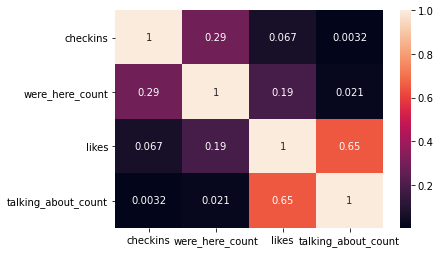

In [253]:
sns.heatmap(df.corr(), annot = True)

By this plot we can see there is somehow a big correlation between likes and talking_about_count. The thing is, here I have filtered the facebook data for those whose checkins values are more than 10000.
Also, there is no correlation between checkins and likes.
Let's filter the checkins column with a higher value, and see what happens! :)

In [287]:
df = facebook[facebook['checkins'] > 5000000]

In [288]:
df = df.drop(['dataset_id','facebook_id'], axis=1)

In [289]:
df.reset_index(inplace = True, drop = True)

<AxesSubplot:>

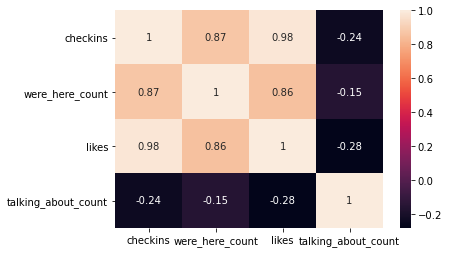

In [290]:
sns.heatmap(df.corr(), annot = True)

By the plot above, when the checkins data was filtered to the data greater than 5000000, we noticed a significant correlation between like and checkins. However, there is no correlation between talking_about_count and likes, or between  talking_about_count and checkins. 